In [1]:
import numpy as np
from numpy import pi as pi
#%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sympy as sp

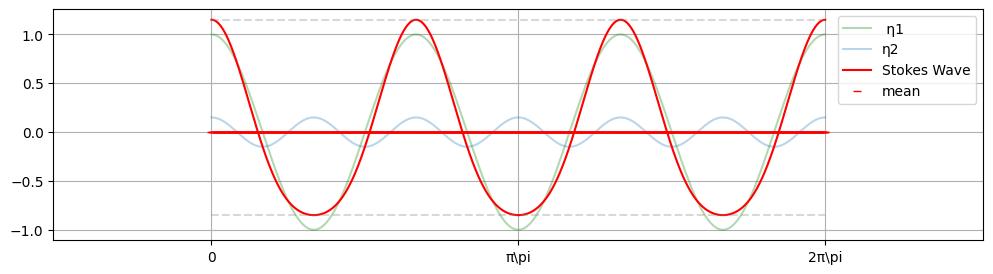

In [2]:
A = 1.0  # Amplitude of the wave
k = 3.0  # Wave number
omega = 0.5  # Angular frequency
#phi = np.pi/4  # Phase angle (45 degrees in radians)
phi = 0
chi = lambda k, omega, x, t, phi: k*x-omega*t - phi
t_0 = 0
epsilon = 0.1

x = np.linspace(0, 2*np.pi, 1000)
y0 = np.zeros(len(x))
eta_1st_order = lambda A, k, omega, x, t_0, phi: A* np.cos(chi(k,omega,x,t_0, phi))
eta_2nd_order = lambda A, k, omega, x, t_0, phi: 0.5 * k * epsilon * A**2 *  np.cos( 2* chi(k,omega,x,t_0, phi))
stokes_wave_data = np.array(eta_2nd_order(A, k, omega, x, t_0, phi) + eta_1st_order(A, k, omega, x, t_0, phi))

# Stokes wave equation
#y = A * np.cos(k * t - omega * t + phi) - 0.5 * k * epsilon * A**2 * np.cos(2 * omega * t + 2 * phi)

# Plot the Stokes wave
fig, ax = plt.subplots(figsize = (12,3))
ax.set_xlim(-pi,5*pi)
ax.set_ylim(-1.5, 3)
ax.grid()
ax.axis('equal')
alpha = 0.3
ax.set_xticks(np.arange(-pi, 4*pi, pi))
ax.set_xticklabels((r"\-pi\-pi", "0", r"π\pi", r"2π\pi",r"3π\pi"))
ax.plot(x, eta_1st_order(A, k, omega, x, t_0, phi), color = 'green', label = " η1", alpha = alpha)
ax.plot(x, eta_2nd_order(A, k, omega, x, t_0, phi), label = 'η2', alpha = alpha)
ax.plot(x, y0, '--', color = 'red', alpha = alpha)
ax.plot(x, stokes_wave_data, label='Stokes Wave', color = 'red')
ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.min()), '--', color = 'grey', alpha = alpha)
ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.max()), '--', color = 'grey', alpha = alpha)
ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.mean()), '_', color = 'red', label = 'mean')
_= ax.legend()

In [3]:
stokes_heights = stokes_wave_data.max() - stokes_wave_data
stokes_heights.mean(), stokes_wave_data.mean()

(1.14885, 0.0011499999999998848)

In [4]:
from scipy.stats import skew, kurtosis
skewness = skew(stokes_wave_data)
kurt = kurtosis(stokes_wave_data)
skewness, kurt

(0.30604564808857265, -1.4372555152254671)

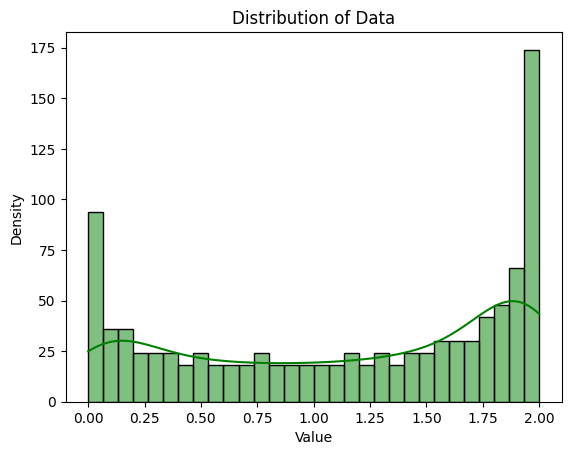

In [5]:
import seaborn as sns
import numpy as np

# Generate example data
data = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution as an example

# Create a histogram using Seaborn
sns.histplot(stokes_heights, bins=30, kde=True, color='green')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Data')

# Show the plot
plt.show()

In [6]:
#matplotlib notebook
#%matplotlib widget

from ipywidgets import interact
def plot_stokes_wave(A, k, omega):
    A = 1.0  # Amplitude of the wave
   # k = 3.0  # Wave number
    #omega = 0.5  # Angular frequency
    #phi = np.pi/4  # Phase angle (45 degrees in radians)
    phi = 0
    chi = lambda k, omega, x, t, phi: k*x-omega*t - phi
    t_0 = 0
    epsilon = 0.1

    x = np.linspace(0, 2*np.pi, 1000)
    y0 = np.zeros(len(x))
    eta_1st_order = lambda A, k, omega, x, t_0, phi: A* np.cos(chi(k,omega,x,t_0, phi))
    eta_2nd_order = lambda A, k, omega, x, t_0, phi: 0.5 * k * epsilon * A**2 *  np.cos( 2* chi(k,omega,x,t_0, phi))
    stokes_wave_data = np.array(eta_2nd_order(A, k, omega, x, t_0, phi) + eta_1st_order(A, k, omega, x, t_0, phi))

    # Stokes wave equation
    #y = A * np.cos(k * t - omega * t + phi) - 0.5 * k * epsilon * A**2 * np.cos(2 * omega * t + 2 * phi)

    # Plot the Stokes wave
    fig, ax = plt.subplots(figsize = (12,3))
    #ax.clear()
    ax.set_xlim(-pi,5*pi)
    ax.set_ylim(-1.5, 3)
    ax.grid()
    ax.axis('equal')
    ax.set_xticks(np.arange(-pi, 4*pi, pi))
    ax.set_xticklabels((r"\-pi\-pi", "0", r"π\pi", r"2π\pi",r"3π\pi"))
    ax.plot(x, eta_1st_order(A, k, omega, x, t_0, phi), color = 'green', label = " η1")
    ax.plot(x, eta_2nd_order(A, k, omega, x, t_0, phi), label = 'η2')
    ax.plot(x, y0, '--', color = 'red')
    ax.plot(x, stokes_wave_data, label='Stokes Wave', color = 'red')
    ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.min()), '--', color = 'grey')
    ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.max()), '--', color = 'grey')
    _= ax.legend()
    
interact(plot_stokes_wave, k=(0, 10, 0.1), omega=(0, 10, 0.1), A = (0, 10, 0.1) )

interactive(children=(FloatSlider(value=5.0, description='A', max=10.0), FloatSlider(value=5.0, description='k…

<function __main__.plot_stokes_wave(A, k, omega)>

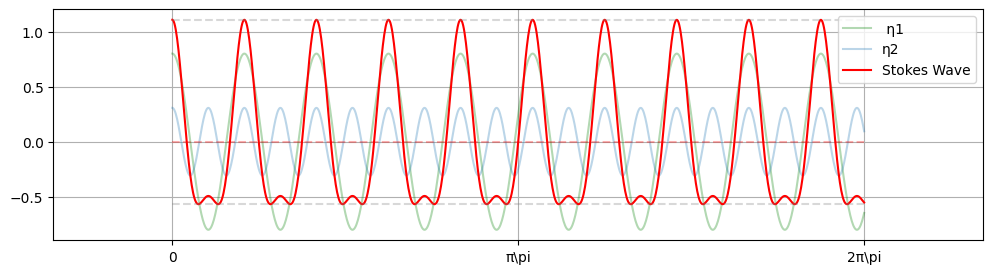

In [7]:
A = 0.8  # Amplitude of the wave
k = 9.6  # Wave number
omega = 5  # Angular frequency
phi = 0
t_0 = 0
epsilon = 0.1

x = np.linspace(0, 2*np.pi, 1000)
y0 = np.zeros(len(x))
chi = lambda k, omega, x, t, phi: k*x - omega*t - phi
eta_1st_order = lambda A, k, omega, x, t_0, phi: A* np.cos(chi(k,omega,x,t_0, phi))
eta_2nd_order = lambda A, k, omega, x, t_0, phi: 0.5 * k * epsilon * A**2 *  np.cos( 2* chi(k,omega,x,t_0, phi))
stokes_wave_data = np.array(eta_2nd_order(A, k, omega, x, t_0, phi) + eta_1st_order(A, k, omega, x, t_0, phi))

fig, ax = plt.subplots(figsize = (12,3))
ax.set_xlim(-pi,5*pi)
ax.set_ylim(-1.5, 3)
ax.grid()
ax.axis('equal')
ax.set_xticks(np.arange(-pi, 4*pi, pi))
alpha = 0.3
ax.set_xticklabels((r"\-pi\-pi", "0", r"π\pi", r"2π\pi",r"3π\pi"))
ax.plot(x, eta_1st_order(A, k, omega, x, t_0, phi), color = 'green', label = " η1", alpha = alpha)
ax.plot(x, eta_2nd_order(A, k, omega, x, t_0, phi), label = 'η2', alpha = alpha)
ax.plot(x, y0, '--', color = 'red', alpha = alpha)
ax.plot(x, stokes_wave_data, label='Stokes Wave', color = 'red')
ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.min()), '--', color = 'grey', alpha = alpha)
ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.max()), '--', color = 'grey', alpha = alpha)
_= ax.legend()